In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [3]:
wine_quality = fetch_ucirepo(id=186)

# Pre-processing
df = wine_quality.data.original

def categorize_quality(quality):
    if quality < 7:
        return 'low'
    else:
        return 'high'

df['quality_category'] = df['quality'].apply(categorize_quality)

red_wine_df = df[df['color'] == 'red']
white_wine_df = df[df['color'] == 'white']

df_array = [red_wine_df, white_wine_df, df]

In [49]:
df_names = ['Red Wine', 'White Wine', 'Combined Wine']

def confusion_matrix_plot(y_test, y_pred, clf, model):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=clf.classes_)

    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for DataFrame {model.__class__.__name__}')
    plt.show()

def optimized_folds(model, X, y):
    best_score = 0
    best_folds = 0
    
    for folds in np.arange(2, 11):
        scores = cross_val_score(model, X, y, cv=folds, scoring='f1_macro')
        if scores.mean() > best_score:
            best_score = scores.mean()
            best_folds = folds
    
    print(f"Best Folds: {best_folds} | Best Score: {best_score}", end=" | ")
    return best_folds

In [50]:
def descriminant_analysis(model, wine_df):
    # set up data
    X = wine_df.drop(columns=['quality', 'quality_category', 'color'])
    y = wine_df['quality_category']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    # find optimized num
    folds = optimized_folds(model, X_train, y_train)

    # find optimixed priors
    priors = []
    for low_prior in np.arange(0.05, 0.36, 0.1):  
        high_prior = 1.0 - low_prior  
        priors.append([round(low_prior, 2), round(high_prior, 2)])

    param_grid = {'priors': priors}
    grid_search = GridSearchCV(QuadraticDiscriminantAnalysis(), param_grid, cv=folds)
    grid_search.fit(X_train, y_train)

    clf = QuadraticDiscriminantAnalysis(priors=grid_search.best_params_["priors"])
    print(f'Best priors: {grid_search.best_params_["priors"]}')
    clf.fit(X_train, y_train)

    # Evalutation metrics
    y_pred = clf.predict(X_test)

    print(classification_report(y_test, y_pred))
    confusion_matrix_plot(y_test, y_pred, clf, model)


Processing Red Wine DataFrame
Quadratic Discriminant Analysis
Best Folds: 5 | Best Score: 0.7147906180072032 | Best priors: [0.05, 0.95]
              precision    recall  f1-score   support

        high       0.56      0.34      0.42        65
         low       0.90      0.96      0.93       415

    accuracy                           0.88       480
   macro avg       0.73      0.65      0.68       480
weighted avg       0.86      0.88      0.86       480



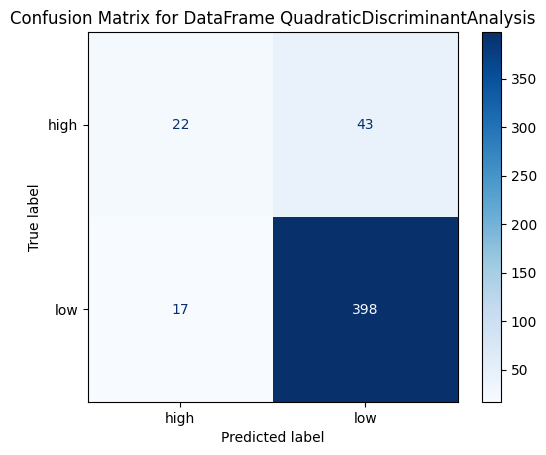

Linear Discriminant Analysis
Best Folds: 5 | Best Score: 0.7001209043051048 | Best priors: [0.05, 0.95]
              precision    recall  f1-score   support

        high       0.56      0.34      0.42        65
         low       0.90      0.96      0.93       415

    accuracy                           0.88       480
   macro avg       0.73      0.65      0.68       480
weighted avg       0.86      0.88      0.86       480



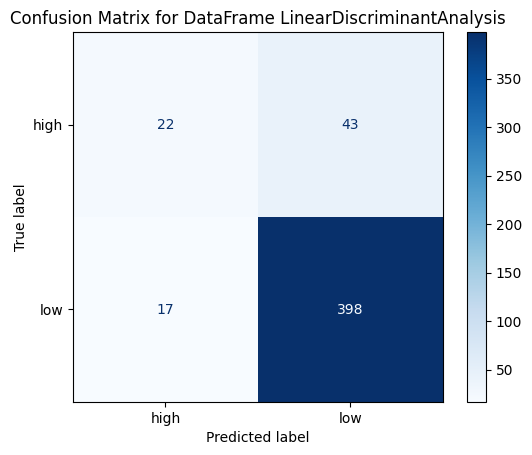

Processing White Wine DataFrame
Quadratic Discriminant Analysis
Best Folds: 4 | Best Score: 0.6960326089536495 | Best priors: [0.05, 0.95]
              precision    recall  f1-score   support

        high       0.61      0.31      0.42       318
         low       0.83      0.95      0.89      1152

    accuracy                           0.81      1470
   macro avg       0.72      0.63      0.65      1470
weighted avg       0.79      0.81      0.78      1470



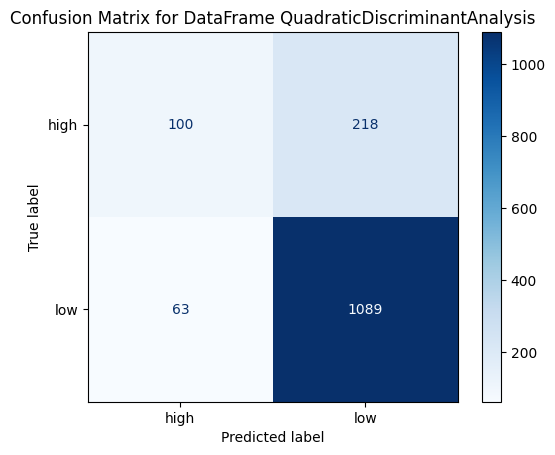

Linear Discriminant Analysis
Best Folds: 2 | Best Score: 0.6541775394645224 | Best priors: [0.05, 0.95]
              precision    recall  f1-score   support

        high       0.61      0.31      0.42       318
         low       0.83      0.95      0.89      1152

    accuracy                           0.81      1470
   macro avg       0.72      0.63      0.65      1470
weighted avg       0.79      0.81      0.78      1470



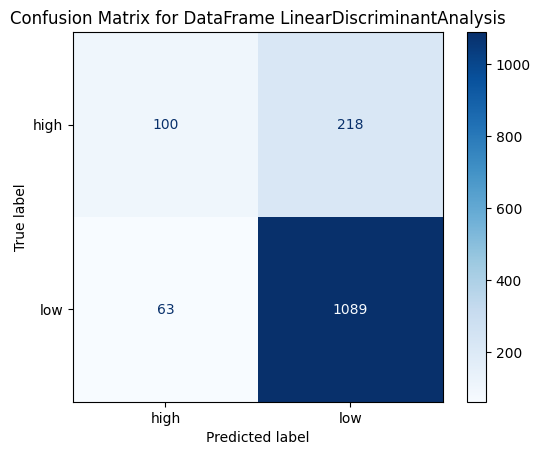

Processing Combined Wine DataFrame
Quadratic Discriminant Analysis
Best Folds: 4 | Best Score: 0.6932002914784658 | Best priors: [0.05, 0.95]
              precision    recall  f1-score   support

        high       0.60      0.39      0.47       383
         low       0.86      0.94      0.90      1567

    accuracy                           0.83      1950
   macro avg       0.73      0.66      0.68      1950
weighted avg       0.81      0.83      0.81      1950



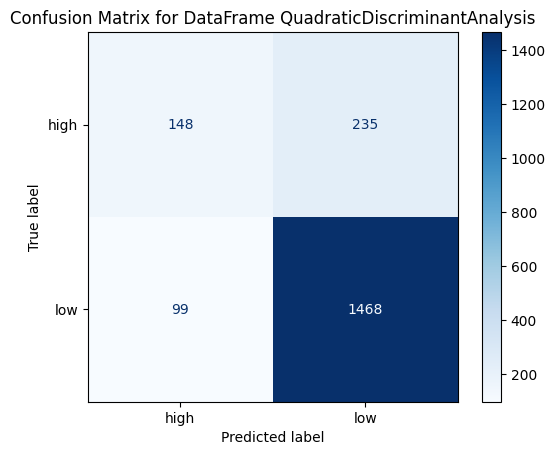

Linear Discriminant Analysis
Best Folds: 3 | Best Score: 0.6497537887269605 | Best priors: [0.05, 0.95]
              precision    recall  f1-score   support

        high       0.60      0.39      0.47       383
         low       0.86      0.94      0.90      1567

    accuracy                           0.83      1950
   macro avg       0.73      0.66      0.68      1950
weighted avg       0.81      0.83      0.81      1950



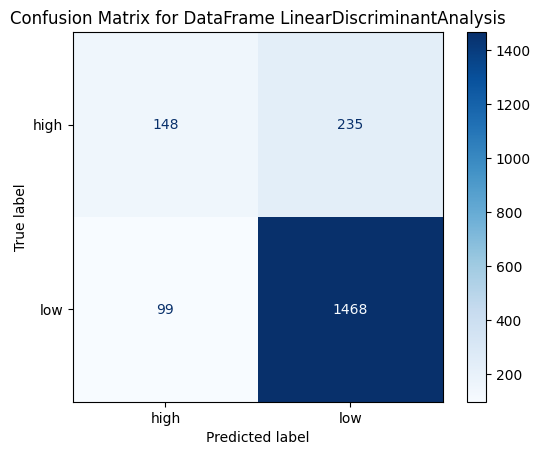

In [52]:
qda = QuadraticDiscriminantAnalysis()
lda = LinearDiscriminantAnalysis()

for i, wine_df in enumerate(df_array):
    print("=" * 40)
    print(f"Processing {df_names[i]} DataFrame")
    print("=" * 40)

    print(f"Quadratic Discriminant Analysis")
    descriminant_analysis(qda, wine_df)
    print(f"Linear Discriminant Analysis")
    descriminant_analysis(lda, wine_df)

## Analysis
1. doesnt matter between QDA and LDA 
2. worse the random forest